### Hierarchical Clustering | Agglomerative Clustering

In [1]:
import pandas as pd

In [2]:
# Reading the data
data = pd.read_csv('crime_data.csv', index_col=0)
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


### Scaling the data

In [4]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_data = pd.DataFrame(Scaler.fit_transform(data), index = data.index, columns=data.columns )
scaled_data[:5]

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


### Building the model 

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [6]:
hier_model_scores = []
for i in range(2,11):
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    model.fit(scaled_data)
    score = silhouette_score(scaled_data, model.labels_)
    hier_model_scores.append((i, score))
    
hier_model_scores

[(2, 0.23455598753159795),
 (3, 0.14582343625170263),
 (4, 0.174058063042673),
 (5, 0.21127138005172738),
 (6, 0.15038419906489478),
 (7, 0.14569917236367297),
 (8, -0.031850582164404256),
 (9, 0.119031054793955),
 (10, 0.13947806156459552)]

### Hence will go with clusters = 2 as an optimum no. of clusters as Silhouette Score is maximum for this value

In [7]:
model_hierarchical = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='single')
model_hierarchical

AgglomerativeClustering(linkage='single')

In [8]:
model_hierarchical.fit(scaled_data)

AgglomerativeClustering(linkage='single')

In [9]:
model_hierarchical.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
data['hierarchy_clusterId'] = model_hierarchical.fit_predict(scaled_data)
data.head()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,0


In [11]:
data.groupby(['hierarchy_clusterId']).count()

,Murder,Assault,UrbanPop,Rape
hierarchy_clusterId,,,,
0,49,49,49,49
1,1,1,1,1


In [12]:
data.groupby(['hierarchy_clusterId']).agg(['mean', 'max', 'min'])

Murder                 Assault             UrbanPop  \
                          mean   max   min        mean  max  min       mean   
hierarchy_clusterId                                                           
0                     7.742857  17.4   0.8  168.877551  337   45  65.897959   
1                    10.000000  10.0  10.0  263.000000  263  263  48.000000   

                                  Rape              
                    max min       mean   max   min  
hierarchy_clusterId                                 
0                    91  32  20.757143  46.0   7.3  
1                    48  48  44.500000  44.5  44.5

In [13]:
data[data['hierarchy_clusterId'] == 1]

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId
Alaska,10.0,263,48,44.5,1


In [14]:
for x,y in data.groupby(['hierarchy_clusterId']):
    print(y)
    print('---------------------------------------------------')

                Murder  Assault  UrbanPop  Rape  hierarchy_clusterId
Alabama           13.2      236        58  21.2                    0
Arizona            8.1      294        80  31.0                    0
Arkansas           8.8      190        50  19.5                    0
California         9.0      276        91  40.6                    0
Colorado           7.9      204        78  38.7                    0
Connecticut        3.3      110        77  11.1                    0
Delaware           5.9      238        72  15.8                    0
Florida           15.4      335        80  31.9                    0
Georgia           17.4      211        60  25.8                    0
Hawaii             5.3       46        83  20.2                    0
Idaho              2.6      120        54  14.2                    0
Illinois          10.4      249        83  24.0                    0
Indiana            7.2      113        65  21.0                    0
Iowa               2.2       56   

In [15]:
models_performance = [('hierarchical',hier_model_scores[0][1])]

### Trying GridSearch CV for linkage and no. of clusters

In [16]:
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# model = AgglomerativeClustering()
# clusters = np.array(range(2,11))
# linkages = np.array(['single', 'complete', 'ward', 'average'])
# param = dict(n_clusters=clusters, linkage=linkages)

# grid = GridSearchCV(estimator=model, param_grid=param, scoring=silhouette_score)
# grid.fit(scaled_data)

In [17]:
# grid.best_estimator_

In [18]:
# grid.best_params_

In [19]:
# grid.cv_results_

### No benefit of using other linkages and no. of clusters combinations through gridsearchCV

## Dendrogram 

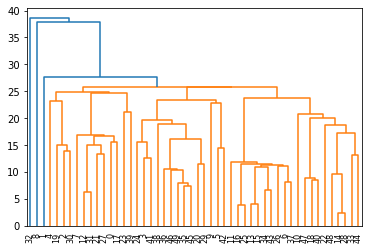

In [20]:
from scipy.cluster import hierarchy

hr = hierarchy.linkage(data, method='single')

dn = hierarchy.dendrogram(hr)

## K-Means Clustering

### Applying hyper parameter tuning | Will choose the best no. of clusters


In [41]:
from sklearn.cluster import KMeans

wcss_tuple = []
wcss = []
silhouette = []

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(scaled_data)
    # inertia is the WCSS (within cluster sum of squares) which we aim to be minimum
    wcss_tuple.append((i, model.inertia_))
    wcss.append(model.inertia_)
    silhouette.append((i,silhouette_score(scaled_data, model.labels_)))
    
wcss_tuple

[(2, 104.96163315756871),
 (3, 80.08569526137275),
 (4, 57.55425863091104),
 (5, 50.33327385184907),
 (6, 44.259807638112314),
 (7, 40.912667222473445),
 (8, 35.695877063333725),
 (9, 32.57509993011513),
 (10, 29.25349891673461)]

In [42]:
wcss

[104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.33327385184907,
 44.259807638112314,
 40.912667222473445,
 35.695877063333725,
 32.57509993011513,
 29.25349891673461]

In [43]:
silhouette

[(2, 0.4084890326217641),
 (3, 0.30813622648945616),
 (4, 0.33968891433344395),
 (5, 0.2892698909578641),
 (6, 0.3005771754063692),
 (7, 0.2761342454285954),
 (8, 0.24606152983626525),
 (9, 0.2359060232768202),
 (10, 0.2636703762849359)]

### Visualizing through elbow plot

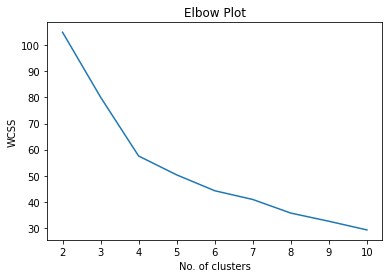

In [24]:
from matplotlib import pyplot as plt

#plt.plot(range(2,11), ([i[1]] for i in wcss))
plt.plot(range(2,11), wcss)

plt.title('Elbow Plot')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

 

### Hence, will go with optimum no. of clusters = 4

In [25]:
model_Kmeans = KMeans(n_clusters=4, random_state=42)

data['K-Means-clusterId'] = model_Kmeans.fit_predict(scaled_data)


In [26]:
# Labels given to each datapoint by the model
model_Kmeans.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [27]:
for x,y in data.groupby(['K-Means-clusterId']):
    print(y)
    print('------------------------------------------------------------------')

               Murder  Assault  UrbanPop  Rape  hierarchy_clusterId  \
Connecticut       3.3      110        77  11.1                    0   
Delaware          5.9      238        72  15.8                    0   
Hawaii            5.3       46        83  20.2                    0   
Indiana           7.2      113        65  21.0                    0   
Kansas            6.0      115        66  18.0                    0   
Massachusetts     4.4      149        85  16.3                    0   
New Jersey        7.4      159        89  18.8                    0   
Ohio              7.3      120        75  21.4                    0   
Oklahoma          6.6      151        68  20.0                    0   
Oregon            4.9      159        67  29.3                    0   
Pennsylvania      6.3      106        72  14.9                    0   
Rhode Island      3.4      174        87   8.3                    0   
Utah              3.2      120        80  22.9                    0   
Virgin

In [34]:
# Analysing the characteristics of each cluster
data.groupby(['K-Means-clusterId']).agg(['mean','max','min'])

Murder                Assault             UrbanPop      \
                        mean   max  min        mean  max  min       mean max   
K-Means-clusterId                                                              
0                   5.656250   8.5  3.2  138.875000  238   46  73.875000  89   
1                  13.937500  17.4  8.8  243.625000  337  188  53.750000  66   
2                  10.815385  15.4  7.9  257.384615  335  178  76.000000  91   
3                   3.600000   9.7  0.8   78.538462  120   45  52.076923  66   

                            Rape             hierarchy_clusterId          
                  min       mean   max   min                mean max min  
K-Means-clusterId                                                         
0                  60  18.781250  29.3   8.3            0.000000   0   0  
1                  44  21.412500  26.9  16.1            0.000000   0   0  
2                  48  33.192308  46.0  24.0            0.076923   1   0  
3                  32  12.176923  16.5   7.3            0.000000   0   0

In [36]:
data.groupby(['K-Means-clusterId']).count()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId
K-Means-clusterId,,,,,
0,16,16,16,16,16
1,8,8,8,8,8
2,13,13,13,13,13
3,13,13,13,13,13


In [28]:
# Performance of the model | Range is from -1 to +1. It should be maximum and near to 1. 
# It is definately better than hierarchical clustering
score = silhouette_score(scaled_data, model_Kmeans.labels_)
score


0.33968891433344395

In [29]:
# storing the performances of each clustering algorithm
models_performance.append(('K-Means',score))
models_performance

[('hierarchical', 0.23455598753159795), ('K-Means', 0.33968891433344395)]

In [30]:
# wcss for the model (Within cluster sum of squares) | should be minimum
model_Kmeans.inertia_

57.55425863091104

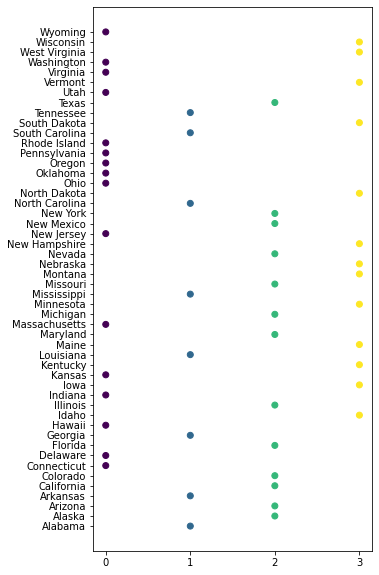

In [33]:
# Plotting all data points corresponding to 3 clusters
plt.figure(figsize=(5,10))
plt.scatter(data['K-Means-clusterId'], data.index, c=data['K-Means-clusterId'])
plt.xticks([0,1,2,3])
plt.show()
plt.legend()

## DB Scan Clustering

In [31]:
data.head()

,Murder,Assault,UrbanPop,Rape,hierarchy_clusterId,K-Means-clusterId
Alabama,13.2,236,58,21.2,0,1
Alaska,10.0,263,48,44.5,1,2
Arizona,8.1,294,80,31.0,0,2
Arkansas,8.8,190,50,19.5,0,1
California,9.0,276,91,40.6,0,2


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

model = DBSCAN()
params = dict(min_samples = [2,5,8,12,15], eps = [0.5, 1, 1.5])